# Latent Semantics and Topic Modeling

The Latent Semantics and Topic Modeling are important subjects in Data Science. They are concerned with discovering properties that are hidden in the data. To illustrate the issue, let's consider a dataset of users represented as vectors of the fruits that they like. For example, `User2` only likes Bananas


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Fruit emojis as columns
fruits = ['🍎', '🍐', '🍊', '🍋', '🍌']

fruits_names = ['apple', 'pear', 'orange', 'lemon', 'banana']

# Users as index
users = [f'User{i+1}' for i in range(10)]

# Hard-coded data
data = [
    [0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1],
    [1, 1, 0, 0, 1],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1]
]

# Create DataFrame
df = pd.DataFrame(data, index=users, columns=fruits)

df

,🍎,🍐,🍊,🍋,🍌
User1,0,0,1,1,0
User2,0,0,0,0,1
User3,1,0,1,1,1
User4,1,1,0,0,1
User5,1,0,1,1,0
User6,1,1,0,0,1
User7,1,1,1,0,0
User8,0,1,1,1,1
User9,1,1,1,1,1
User10,0,0,0,0,1


Let's see what happens when we cluster the fruits based on how users like them:

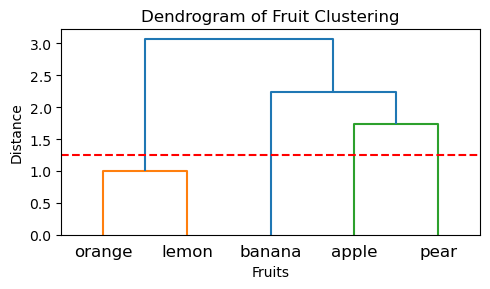

In [2]:
# Transpose the DataFrame so fruits are rows
df_transposed = df.T

# Perform hierarchical clustering
Z = linkage(df_transposed, method='ward')

# Create the dendrogram
plt.figure(figsize=(5, 3))
dendrogram(Z, labels=fruits_names, leaf_rotation=0, leaf_font_size=12)

# Add a best cut line
best_cut = 1.25  # This value can be adjusted based on visual inspection
plt.axhline(y=best_cut, color='r', linestyle='--')

plt.title('Dendrogram of Fruit Clustering')
plt.xlabel('Fruits')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

It looks like Orange/Lemon and Apple/Pear make good clusters. Why?

Probably because these fruits have something in common that the users like. For example, Orange and Lemon are citrous fruits, therefore users that like oranges probably like lemons because they like citrous flavors. Similarly, Apple and Pear may be related because users like the firm texture.

See how "citrousness" and "firmness" could be hidden properties of the fruits? We say that the Latent properties of the fruits.

But why did we find these properties in the data? Because the preferences of the users make them correlated. See the correlation matrix below.

In [3]:
df_map = df.corr()

df_map = df_map.style.background_gradient(cmap='RdBu', vmax=1, vmin=-1)

df_map

,🍎,🍐,🍊,🍋,🍌
🍎,1.000000,0.408248,0.166667,-0.000000,-0.089087
🍐,0.408248,1.000000,0.000000,-0.200000,0.218218
🍊,0.166667,0.000000,1.000000,0.816497,-0.534522
🍋,-0.000000,-0.200000,0.816497,1.000000,-0.218218
🍌,-0.089087,0.218218,-0.534522,-0.218218,1.000000


This type of behavior is explored in the Latent Semantic Analysis (LSA) and Topic Modeling tasks. These tasks employ different techniques to discover hidden properties in the data, with applications in Text Analysis, Information Retrieval, Recommender Systems, and many others.